# Question 4. Is the performance linear response to dosage different between different ranges of P/Al ratios?

## Load data

Load data exported from the preprocessing session.

In [1]:
load("output/preprocessed.RData")

## Load packages

We obviously need the **`tidyverse`** package for data manipulation and plotting. **`ggthemes`** provides themes for plots. The **`nlme`** package is used for the linear mixted model. The **`broom`** package is used to create tidied **`nlme`** outputs. **`cowplot`** has the `plot_grid` function, which can create grids of ggplots.

In [2]:
library("tidyverse")
library("broom")
library("nlme")
library("ggthemes")
library("cowplot")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘cowplot’


The following object is masked from ‘package:ggthemes’:

    theme_map




Create P/Al categories.

In [3]:
data_rs["P/Al classes"] <- cut(data_rs$Soil_P.Al * 100, breaks = c(0, 2.5, 5, 10, 20, 30, 200))
data_rs["P/Al classes"] <- fct_recode(data_rs["P/Al classes"] %>% pull(), "(30,..." = "(30,200]")

Create P concentration categories.

In [4]:
data_rs["PM3 classes"] <- cut(data_rs$Soil.MIII.P.ICP_mg.kg, breaks = c(0, 50, 100, 200, 300, 2000))
data_rs["PM3 classes"] <- fct_recode(data_rs["PM3 classes"] %>% pull(), "(300,..." = "(300,2e+03]")

## Mixed models for each performance indices, with and withtout manure

We run (2 manure statuses X 3 performance indices X 6 P/Al levels) + (2 X 3 X 5 P-MIII levels) = 76 models. Each performance indice is ran twice (`_nomanure` and `_manure`), while maping models to P/Al classes, then P-MIII classes.

### Yield

#### P/Al

##### Without manure

In [5]:
mod_yield_P.Al_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  select(Year, ID, yield_t.ha, doseP, `P/Al classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(yield_t.ha ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


##### With manure

In [6]:
mod_yield_P.Al_manure <- data_rs %>%
  filter(is_manure) %>%
  select(Year, ID, yield_t.ha, doseP, `P/Al classes`) %>%
  drop_na() %>%
  filter(`P/Al classes` != "(2.5,5]") %>% # only two points
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(yield_t.ha ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


#### P M-III

##### Without manure

In [7]:
mod_yield_PMIII_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  select(Year, ID, yield_t.ha, doseP, `PM3 classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`PM3 classes`) %>%
  map(~ lme(yield_t.ha ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


##### With manure

In [8]:
mod_yield_PMIII_manure <- data_rs %>%
  filter(is_manure) %>%
  select(Year, ID, yield_t.ha, doseP, `PM3 classes`) %>%
  drop_na() %>%
  filter(`PM3 classes` != "(0,50]") %>% # few points
  droplevels() %>%
  split(.$`PM3 classes`) %>%
  map(~ lme(yield_t.ha ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


### Grain density

#### P/Al

##### Without manure

In [9]:
mod_dens_P.Al_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  select(Year, ID, graindensity_g.L, doseP, `P/Al classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(graindensity_g.L ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


##### With manure

In [10]:
mod_dens_P.Al_manure <- data_rs %>%
  filter(is_manure) %>%
  select(Year, ID, graindensity_g.L, doseP, `P/Al classes`) %>%
  drop_na() %>%
  filter(`P/Al classes` != "(2.5,5]") %>% # only two points
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(graindensity_g.L ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


#### P M-III

##### Without manure

In [11]:
mod_dens_PMIII_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  select(Year, ID, graindensity_g.L, doseP, `PM3 classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`PM3 classes`) %>%
  map(~ lme(graindensity_g.L ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


##### With manure

In [12]:
mod_dens_PMIII_manure <- data_rs %>%
  filter(is_manure) %>%
  select(Year, ID, graindensity_g.L, doseP, `PM3 classes`) %>%
  drop_na() %>%
  filter(`PM3 classes` != "(0,50]") %>% # few points
  droplevels() %>%
  split(.$`PM3 classes`) %>%
  map(~ lme(graindensity_g.L ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


### Grain moisture

#### P/Al

##### Without manure

In [13]:
mod_moist_P.Al_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  filter(grainmoisture_perc > 10) %>%
  select(Year, ID, grainmoisture_perc, doseP, `P/Al classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(grainmoisture_perc ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


##### With manure

In [14]:
mod_moist_P.Al_manure <- data_rs %>%
  filter(is_manure) %>%
  filter(grainmoisture_perc > 10) %>%
  select(Year, ID, grainmoisture_perc, doseP, `P/Al classes`) %>%
  drop_na() %>%
  filter(`P/Al classes` != "(2.5,5]") %>% # only two points
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(grainmoisture_perc ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


#### P M-III

##### Without manure

In [15]:
mod_moist_PMIII_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  select(Year, ID, grainmoisture_perc, doseP, `PM3 classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`PM3 classes`) %>%
  map(~ lme(grainmoisture_perc ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


##### With manure

In [16]:
mod_moist_PMIII_manure <- data_rs %>%
  filter(is_manure) %>%
  select(Year, ID, grainmoisture_perc, doseP, `PM3 classes`) %>%
  drop_na() %>%
  filter(`PM3 classes` != "(0,50]") %>% # few points
  droplevels() %>%
  split(.$`PM3 classes`) %>%
  map(~ lme(grainmoisture_perc ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”
Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


Model statistics are binded in two tables, with and without manure.

In [17]:
mod_stats_P.Al_nomanure <- bind_rows(yield_t.ha = mod_yield_P.Al_nomanure,
                                     graindensity_g.L = mod_dens_P.Al_nomanure,
                                     grainmoisture_perc = mod_moist_P.Al_nomanure,
                                     .id = "perf_indice") %>%
  spread(names, x) %>%
  rename(`P/Al classes` = source)
mod_stats_P.Al_nomanure$`P/Al classes` <- factor(mod_stats_P.Al_nomanure$`P/Al classes`, levels = levels(data_rs$`P/Al classes`))

In [18]:
mod_stats_P.Al_manure <- bind_rows(yield_t.ha = mod_yield_P.Al_manure,
                                   graindensity_g.L = mod_dens_P.Al_manure,
                                   grainmoisture_perc = mod_moist_P.Al_manure, 
                                   .id = "perf_indice") %>%
  spread(names, x) %>%
  rename(`P/Al classes` = source)
mod_stats_P.Al_manure$`P/Al classes` <- factor(mod_stats_P.Al_manure$`P/Al classes`, levels = levels(data_rs$`P/Al classes`))

In [19]:
mod_stats_PMIII_nomanure <- bind_rows(yield_t.ha = mod_yield_PMIII_nomanure,
                                      graindensity_g.L = mod_dens_PMIII_nomanure,
                                      grainmoisture_perc = mod_moist_PMIII_nomanure, 
                                      .id = "perf_indice") %>%
  spread(names, x) %>%
  rename(`PM3 classes` = source)
mod_stats_PMIII_nomanure$`PM3 classes` <- factor(mod_stats_PMIII_nomanure$`PM3 classes`, levels = levels(data_rs$`PM3 classes`))

levels(mod_stats_PMIII_nomanure$`PM3 classes`) <- levels(data_rs$`PM3 classes`)

In [20]:
mod_stats_PMIII_manure <- bind_rows(yield_t.ha = mod_yield_PMIII_manure,
                                    graindensity_g.L = mod_dens_PMIII_manure,
                                    grainmoisture_perc = mod_moist_PMIII_manure, 
                                    .id = "perf_indice") %>%
  spread(names, x) %>%
  rename(`PM3 classes` = source)
mod_stats_PMIII_manure$`PM3 classes` <- factor(mod_stats_PMIII_manure$`PM3 classes`)
levels(mod_stats_PMIII_manure$`PM3 classes`) <- levels(data_rs$`PM3 classes`)[-1]

## Plot

We will rename performance indices with prettier names.

In [21]:
transform_pretty <- function(x) {
    x %>%
    mutate(term = case_when(
      perf_indice == "yield_t.ha" ~ "Grain yield",
      perf_indice == "graindensity_g.L" ~ "Bulk density",
      perf_indice == "grainmoisture_perc" ~ "Grain moisture"),
         unitN = case_when(
      perf_indice == "yield_t.ha" ~ "Mg",
      perf_indice == "graindensity_g.L" ~ "g",
      perf_indice == "grainmoisture_perc" ~ "%"),
         unitD = case_when(
      perf_indice == "yield_t.ha" ~ " ha",
      perf_indice == "graindensity_g.L" ~ " L",
      perf_indice == "grainmoisture_perc" ~ ""),
        inverse = case_when(
      perf_indice == "yield_t.ha" ~ "-1",
      perf_indice == "graindensity_g.L" ~ "-1",
      perf_indice == "grainmoisture_perc" ~ "")) 
}

### P/Al

#### Without manure

In [22]:
mod_stats_P.Al_nomanure_pretty <- mod_stats_P.Al_nomanure %>%
  transform_pretty() %>%
  mutate(`P/Al classes` = paste("P/Al", `P/Al classes`))

nomanure_df <- data_rs %>%
  gather(key = "perf_indice", value = "performance", yield_t.ha, graindensity_g.L, grainmoisture_perc) %>%
  transform_pretty() %>%
  mutate(`P/Al classes` = paste("P/Al", `P/Al classes`)) %>%
  filter(!is_manure) %>%
  select(`P/Al classes`, `PM3 classes`, perf_indice, doseP, performance, term, unitN, unitD, inverse)

Adjust level order.

In [23]:
levels_p.al <- c('P/Al (0,2.5]', 'P/Al (2.5,5]', 'P/Al (5,10]', 'P/Al (10,20]',
                 'P/Al (20,30]', 'P/Al (30,...')

nomanure_df$`P/Al classes` <- factor(nomanure_df$`P/Al classes`,
                                    levels = levels_p.al)

mod_stats_P.Al_nomanure_pretty$`P/Al classes` <- factor(mod_stats_P.Al_nomanure_pretty$`P/Al classes`,
                                                        levels = levels_p.al)

The expression on the y-axis can go through a label_parser.

In [24]:
gg_nomanure <- nomanure_df %>%
  ggplot(aes(x = doseP, y = performance)) +
  geom_point(size = 1.5, alpha = 0.5, pch = 21, fill = "white") +
  geom_abline(data = mod_stats_P.Al_nomanure_pretty, aes(intercept = `(Intercept)`, slope = doseP), size = 0.75) +
  facet_grid(term + unitD + unitN + inverse ~ `P/Al classes`,
             scales = "free",
             labeller = label_bquote(rows = .(term)~"("*.(unitN)~.(unitD)^.(inverse)*")"),
             switch = "y") +
  labs(title = "Without manure", x = expression("Dose P (kg ha"^"-1"~")")) +
  expand_limits(x = c(0, 70)) +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        strip.background = element_rect(fill = "transparent", colour = "transparent"),
        strip.placement = "outside",
        strip.text.y = element_text(angle=270))

#### With manure

In [25]:
mod_stats_P.Al_manure_pretty <- mod_stats_P.Al_manure %>%
  transform_pretty() %>%
  mutate(`P/Al classes` = paste("P/Al", `P/Al classes`))

manure_df <- data_rs %>%
  gather(key = "perf_indice", value = "performance", yield_t.ha, graindensity_g.L, grainmoisture_perc) %>%
  transform_pretty() %>%
  mutate(`P/Al classes` = paste("P/Al", `P/Al classes`)) %>%
  filter(is_manure) %>%
  select(`P/Al classes`, perf_indice, doseP, performance, term, unitN, unitD, inverse)

Because their is no data in some P/Al categories, we append empty rows only filled with P/Al categories, assuring that the plot renders all categories, with empty spaces where the category is absent.

In [26]:
# tweak to force ploting the (0,2.5] category
manure_na <- manure_df[1:nlevels(pull(data_rs["P/Al classes"])), ]
manure_na[1:nrow(manure_na), ] <- NA
manure_na[, "P/Al classes"] <- factor(unique(paste("P/Al", levels(data_rs$`P/Al classes`))))
manure_na["perf_indice"] <- "yield_t.ha	"
manure_na["term"] <- "Grain yield"
manure_na["unitN"] <- "Mg"
manure_na["unitD"] <- " ha"
manure_na["inverse"] <- "-1"
manure_df <- bind_rows(manure_df, manure_na)

Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”


Adjust level order.

In [27]:
manure_df$`P/Al classes` <- factor(manure_df$`P/Al classes`,
                                   levels = levels_p.al)

mod_stats_P.Al_manure_pretty$`P/Al classes` <- factor(mod_stats_P.Al_manure_pretty$`P/Al classes`,
                                                      levels = levels_p.al)

In [28]:
gg_manure <- manure_df %>%
  ggplot(aes(x = doseP, y = performance)) +
  geom_point(size = 1.5, alpha = 0.5, pch = 21, fill = "white") +
  geom_abline(data = mod_stats_P.Al_manure_pretty, aes(intercept = `(Intercept)`, slope = doseP), size = 0.75) +
  facet_grid(term + unitD + unitN + inverse ~ `P/Al classes`,
             scales = "free",
             labeller = label_bquote(rows = .(term)~"("*.(unitN)~.(unitD)^.(inverse)*")"),
             switch = "y") +
  labs(title = "With manure", x = expression("Dose P (kg ha"^"-1"~")")) +
  expand_limits(x = c(0, 70)) +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        strip.background = element_rect(fill = "transparent", colour = "transparent"),
        strip.placement = "outside",
        strip.text.y = element_text(angle=270))

#### Plot manure and no manure

Warning message:
“Removed 1942 rows containing missing values (geom_point).”
Warning message:
“Removed 1709 rows containing missing values (geom_point).”


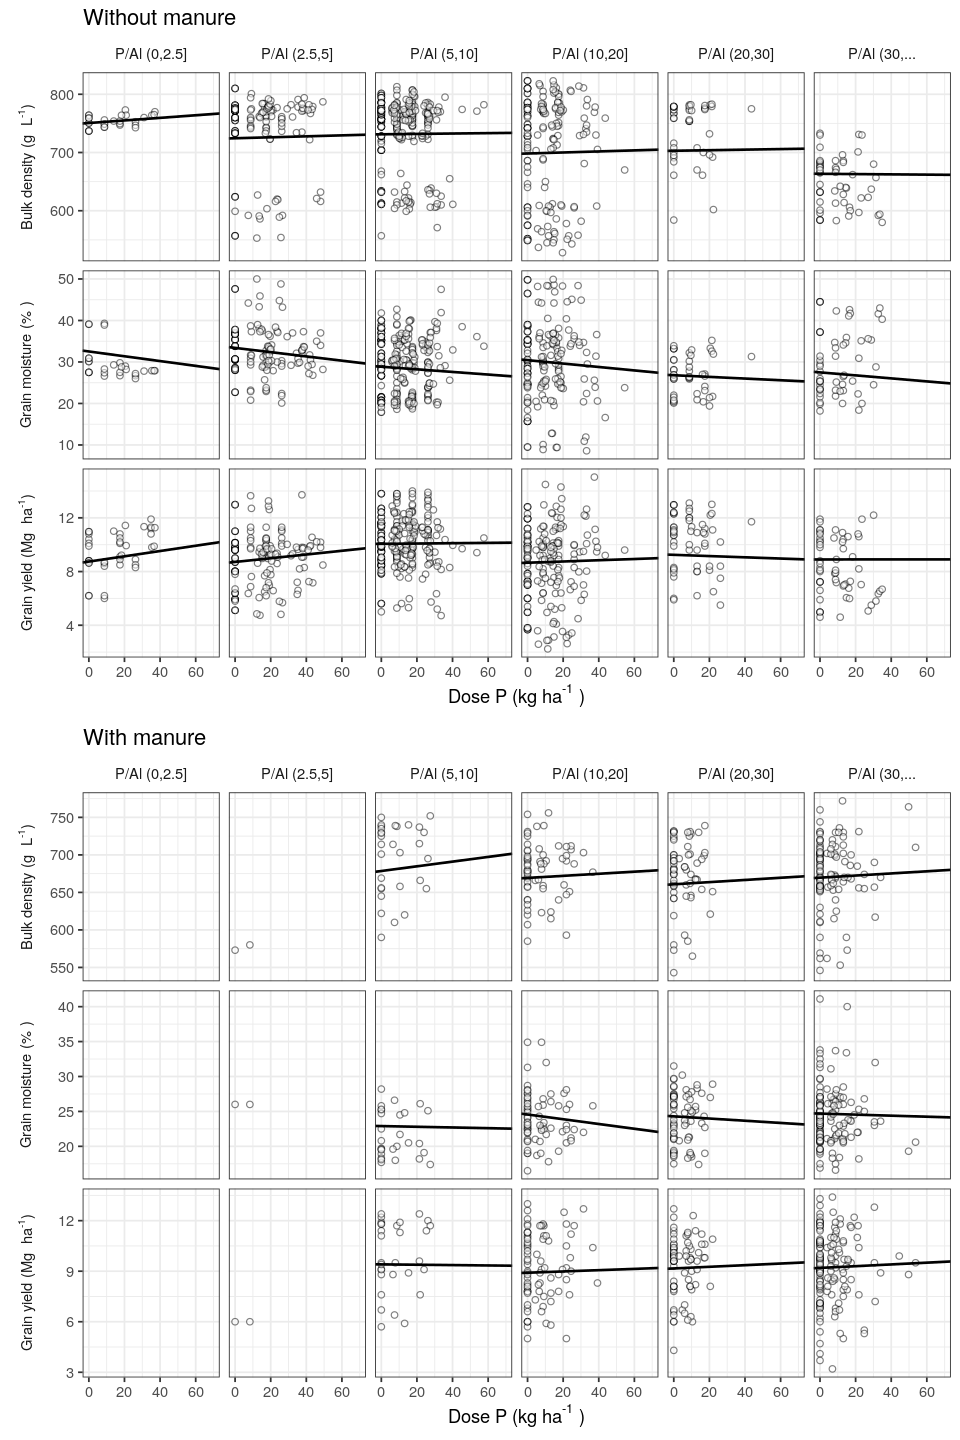

In [29]:
options(repr.plot.width = 8, repr.plot.height = 12)
plot_grid(gg_nomanure, gg_manure, ncol = 1)

In [30]:
ggsave("images/performance-p.al-cat.jpg", height = 10, width = 8, dpi = 600)

### P-MIII

#### Without manure

In [31]:
mod_stats_PMIII_nomanure_pretty <- mod_stats_PMIII_nomanure %>%
  transform_pretty()

nomanure_df <- data_rs %>%
  gather(key = "perf_indice", value = "performance", yield_t.ha, graindensity_g.L, grainmoisture_perc) %>%
  transform_pretty() %>%
  filter(!is_manure) %>%
  select(`PM3 classes`, perf_indice, doseP, performance, term, unitN, unitD, inverse)

Adjust level order.

In [32]:
levels_pm3 <- c('(0,50]', '(50,100]', '(100,200]',
                '(200,300]', '(300,...')
nomanure_df$`PM3 classes` <- factor(nomanure_df$`PM3 classes`,
                                     levels = levels_pm3)
mod_stats_PMIII_nomanure_pretty$`PM3 classes` <- factor(mod_stats_PMIII_nomanure_pretty$`PM3 classes`,
                                                         levels = levels_pm3)

In [33]:
gg_nomanure <- nomanure_df %>%
  ggplot(aes(x = doseP, y = performance)) +
  geom_point(size = 1.5, alpha = 0.5, pch = 21, fill = "white") +
  facet_grid(term + unitD + unitN + inverse ~ `PM3 classes`,
             scales = "free",
             labeller = label_bquote(rows = .(term)~"("*.(unitN)~.(unitD)^.(inverse)*")",
                                     cols = "PM3"~.(as.character(`PM3 classes`))~"(mg kg"^"-1"*")"),
             switch = "y") +
  geom_abline(data = mod_stats_PMIII_nomanure_pretty, aes(intercept = `(Intercept)`, slope = doseP), size = 0.75) +
  labs(title = "Without manure", x = expression("Dose P (kg ha"^"-1"~")")) +
  expand_limits(x = c(0, 70)) +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        strip.background = element_rect(fill = "transparent", colour = "transparent"),
        strip.placement = "outside",
        strip.text.y = element_text(angle=270))

#### With manure

In [34]:
mod_stats_PMIII_manure_pretty <- mod_stats_PMIII_manure %>%
  transform_pretty()

manure_df <- data_rs %>%
  gather(key = "perf_indice", value = "performance", yield_t.ha, graindensity_g.L, grainmoisture_perc) %>%
  transform_pretty() %>%
  filter(is_manure) %>%
  select(`PM3 classes`, perf_indice, doseP, performance, term, unitN, unitD, inverse)

In [35]:
manure_df$`PM3 classes` <- factor(manure_df$`PM3 classes`,
                                   levels = levels_pm3)

mod_stats_PMIII_manure_pretty$`PM3 classes` <- factor(mod_stats_PMIII_manure_pretty$`PM3 classes`,
                                                       levels = levels_pm3)

Warning message:
“Removed 1703 rows containing missing values (geom_point).”


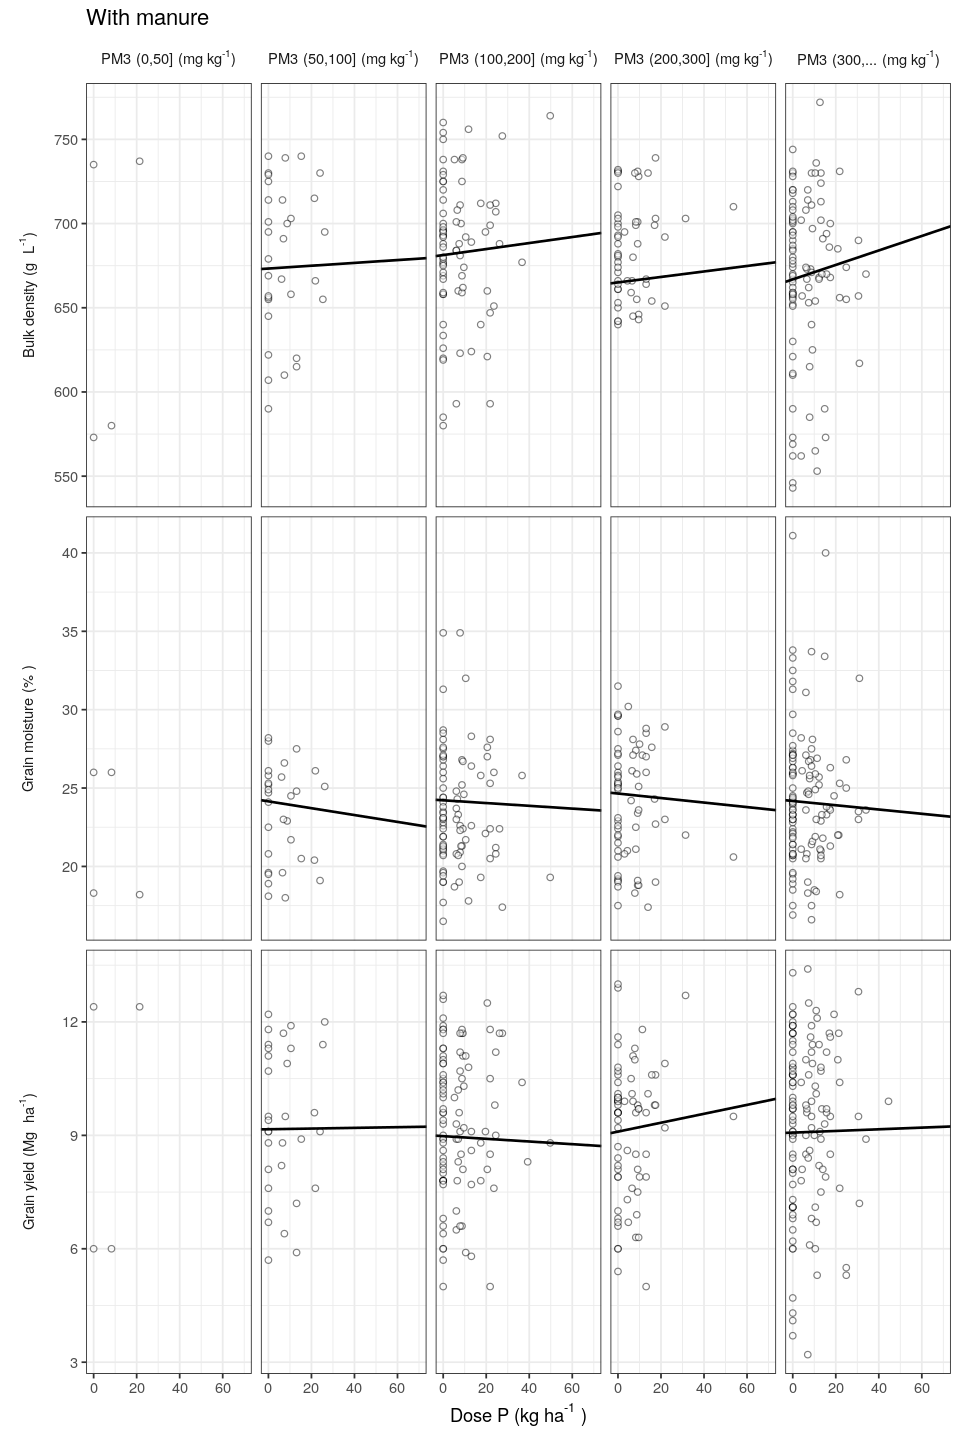

In [36]:
gg_manure <- manure_df %>%
  ggplot(aes(x = doseP, y = performance)) +
  geom_point(size = 1.5, alpha = 0.5, pch = 21, fill = "white") +
  geom_abline(data = mod_stats_PMIII_manure_pretty, aes(intercept = `(Intercept)`, slope = doseP), size = 0.75) +
  facet_grid(term + unitD + unitN + inverse ~ `PM3 classes`,
             scales = "free",
             labeller = label_bquote(rows = .(term)~"("*.(unitN)~.(unitD)^.(inverse)*")",
                                     cols = "PM3"~.(as.character(`PM3 classes`))~"(mg kg"^"-1"*")"),
             switch = "y") +
  labs(title = "With manure", x = expression("Dose P (kg ha"^"-1"~")")) +
  expand_limits(x = c(0, 70)) +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        strip.background = element_rect(fill = "transparent", colour = "transparent"),
        strip.placement = "outside",
        strip.text.y = element_text(angle=270))
gg_manure

Warning message:
“Removed 1942 rows containing missing values (geom_point).”
Warning message:
“Removed 1703 rows containing missing values (geom_point).”


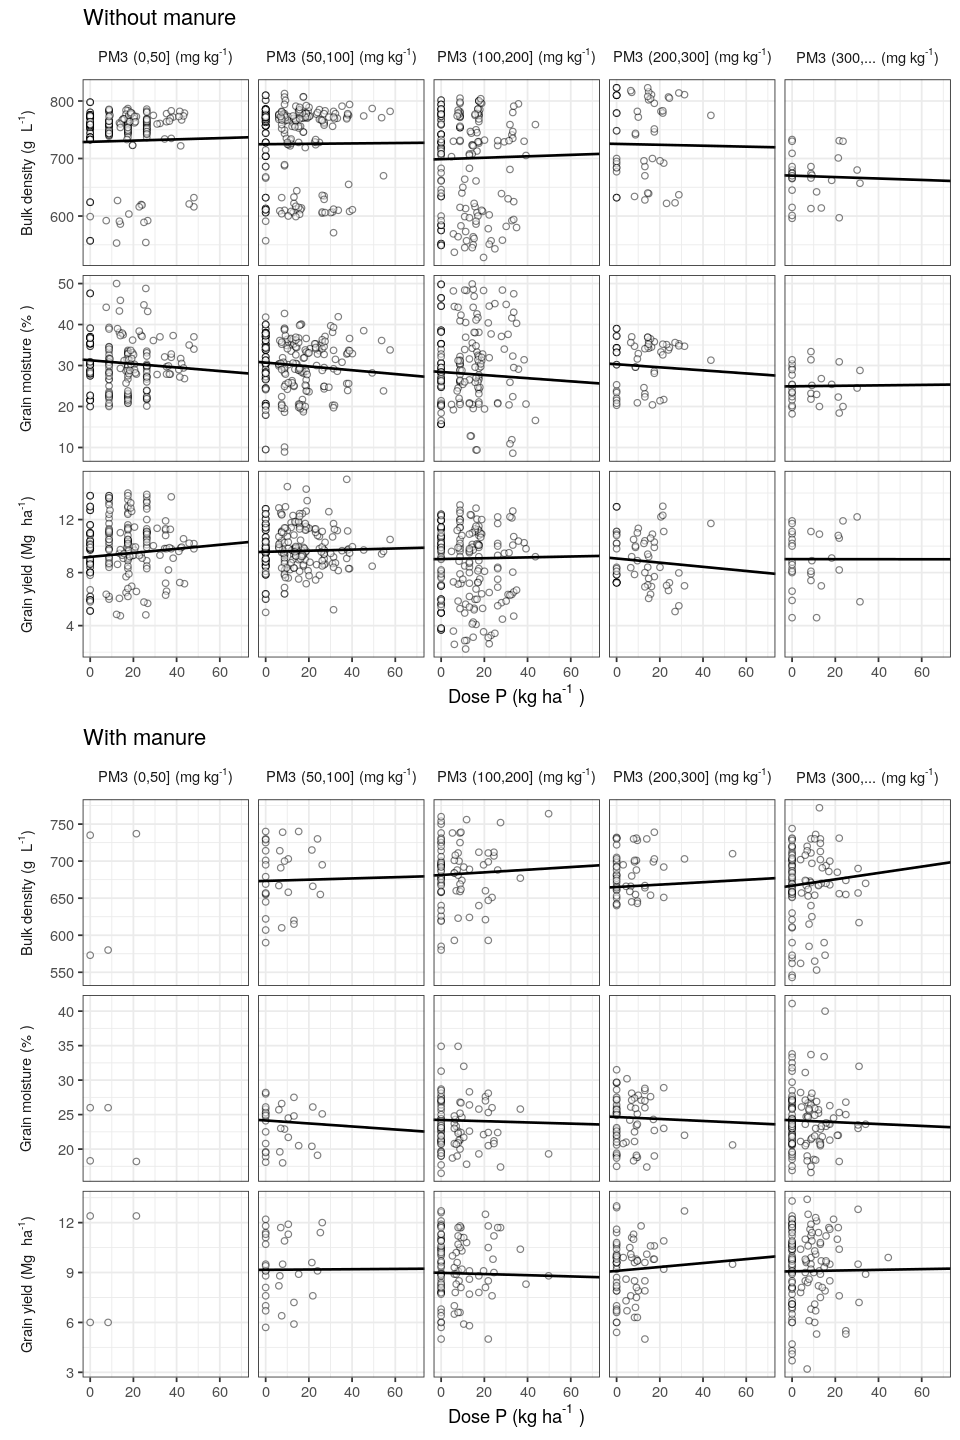

In [37]:
options(repr.plot.width = 8, repr.plot.height = 12)
plot_grid(gg_nomanure, gg_manure, ncol = 1)

In [38]:
ggsave("images/performance-pm3-cat.jpg", height = 10, width = 8, dpi = 600)